# Predicting the sales price of bulldozer using Machine learning 

## 1.Problem definition
> How well we can predict the future sales price of a bulldozer given its characterstics and previous examples how much similar bulldozers have been sold for.

## 2.Data
The data is donwloaded from Kaggle bluebook for bulldozers competition:
There are 3 main datasets:
* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3.Evaluation
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

## 4.Features


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [3]:
#import training and validation sets
df=pd.read_csv('TrainAndValid.csv',low_memory=False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [5]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

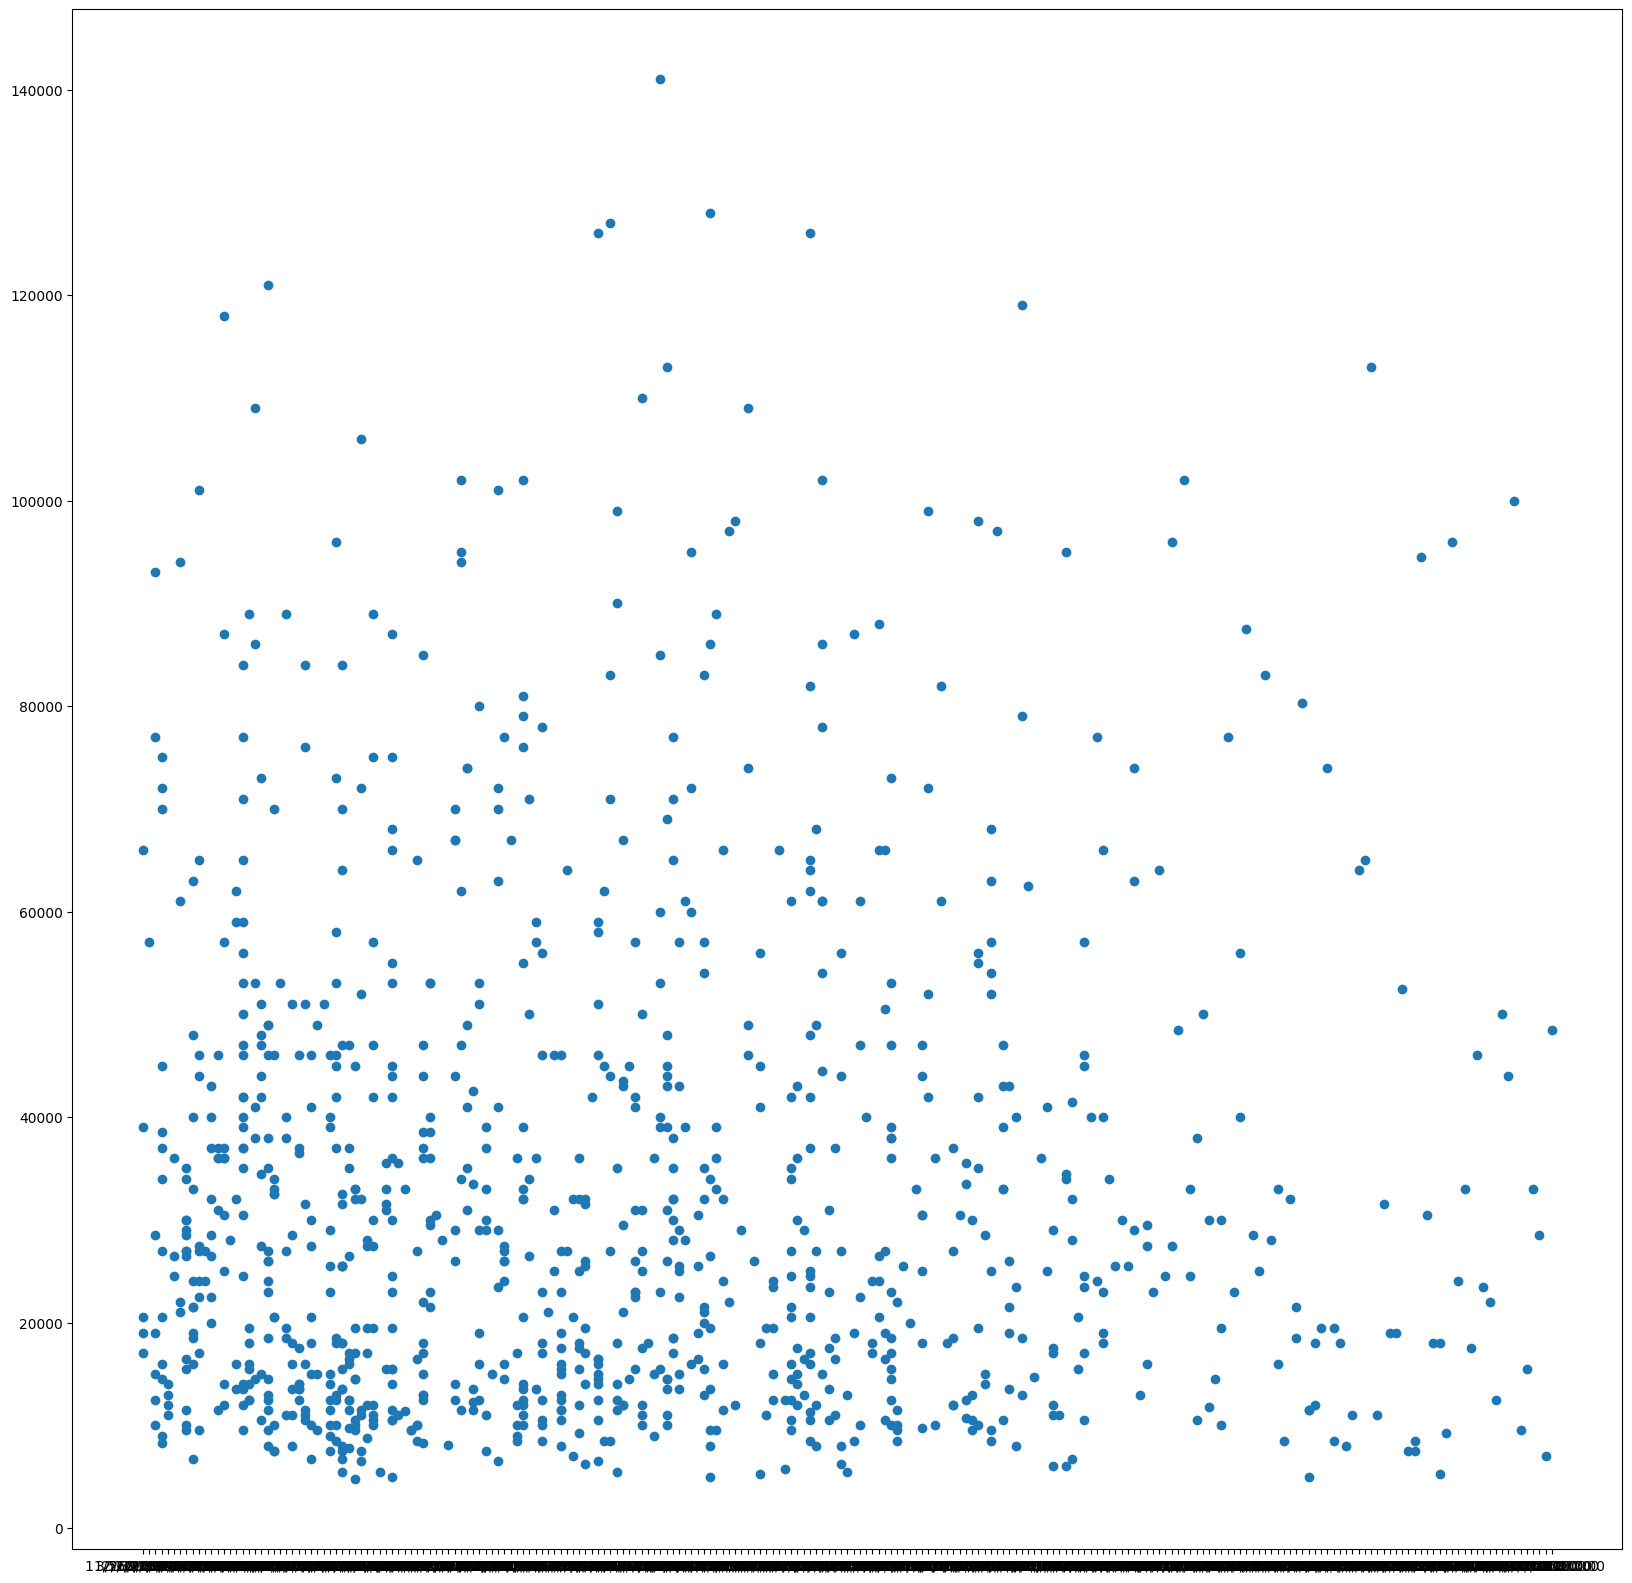

In [7]:
fig,ax=plt.subplots(figsize=(20,20))
ax.scatter(df['saledate'][:1000],df['SalePrice'][:1000])

<Axes: ylabel='Frequency'>

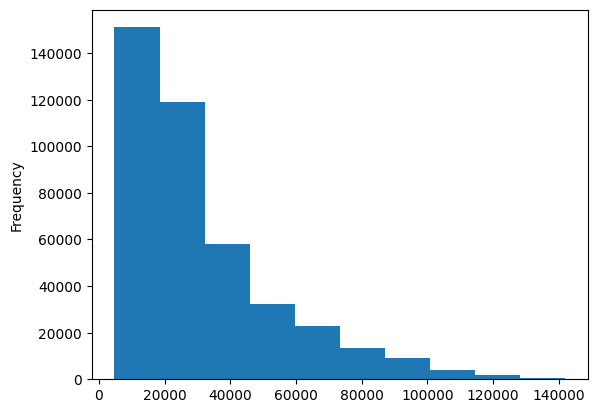

In [8]:
df.SalePrice.plot.hist()

#### Parsing Dates

When we work with time series data , we want to enrich the time & date component as much as possible .

We can do it by telling pandas which of our column have dates in it using `parse_dates` parameter

In [9]:
#Import data again but this time parse dates
df=pd.read_csv("TrainAndValid.csv",low_memory=False,parse_dates=["saledate"])

In [11]:
df.saledate

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
412693   2012-03-07
412694   2012-01-28
412695   2012-01-28
412696   2012-03-07
412697   2012-01-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

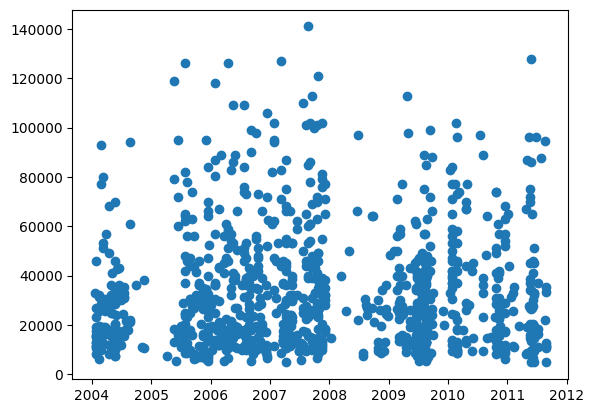

In [13]:
fig,ax=plt.subplots()
ax.scatter(df['saledate'][:1000],df['SalePrice'][:1000])

In [14]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


### Sort dataFrame by saledate

When working with time series data , it's a good idea to sort it by date 

In [16]:
#Sort dataframe in date order
df.sort_values(by=["saledate"],inplace=True,ascending=True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy of original dataframe

We make a copy of original dataframe so when we manipulate the data we have still got our original data


In [17]:
#Make a copy 
df_tmp=df.copy()

#### Add datetime parameters for `saledate` column

In [18]:
df_tmp['saleYear']=df_tmp.saledate.dt.year
df_tmp['saleMonth']=df_tmp.saledate.dt.month
df_tmp['saleDay']=df_tmp.saledate.dt.day
df_tmp['saleDayOfWeek']=df_tmp.saledate.dt.dayofweek
df_tmp['saleDayOfYear']=df_tmp.saledate.dt.dayofyear

In [19]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [21]:
#Now we have enriched our dataset with date time features we can drop our saledate column
df_tmp.drop("saledate",axis=1,inplace=True)

In [23]:
#Check the values of different columns
df_tmp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

#### Converting string data to categories

One way we can convert all our data to numbers is by converting them into pandas categories.


In [26]:
pd.api.types.is_string_dtype(df_tmp['UsageBand'])

False

In [27]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

In [28]:
#Find the columns which contains the strings 
for label ,content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)


fiModelDesc
fiBaseModel
fiProductClassDesc
state
ProductGroup
ProductGroupDesc


In [31]:
#This will turn all the string values to category values
for label ,content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        df_tmp[label]=content.astype("category").cat.as_ordered()

In [32]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

Now we have converted all our data to numeric values but we still have null values in the data

In [34]:
df_tmp.isna().sum().T

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

### Fill the missing values

##### Filling the missing numeric values first

In [35]:
#Check which numeric column have null values
for label,content in df_tmp.items() :
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [36]:
#fill the numeric values with the median
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        #Add a binary column which tells us which data was missing
        df_tmp[label+"_is_missing"]=pd.isnull(content)
        #Fill missing values with median
        df_tmp[label]=content.fillna(content.median())



In [37]:
#Check whether any more null numeric values are reamining
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)


In [39]:
#check to see how many examples were missing
df_tmp.auctioneerID_is_missing.value_counts()

auctioneerID_is_missing
False    392562
True      20136
Name: count, dtype: int64

In [41]:
#check remaining null values
df_tmp.isna().sum().T


SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
                           ..
saleYear_is_missing         0
saleMonth_is_missing        0
saleDay_is_missing          0
saleDayOfWeek_is_missing    0
saleDayOfYear_is_missing    0
Length: 70, dtype: int64

#### Filling and turning categorical variables into numerical variables


In [43]:
 #check which columns have null values
for label,content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [44]:
#Turn categorical values to numbers and fill missing 
for label,content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        #Add binary column to indicate whether the sample had missing values
        df_tmp[label+'_is_missing']=pd.isnull(content)

        #Turn categories to number and add 1
        df_tmp[label]=pd.Categorical(content).codes+1
        

/var/folders/b6/k96kvnc13csbfl5fm_mr75yh0000gn/T/ipykernel_28834/400768709.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_tmp[label+'_is_missing']=pd.isnull(content)
/var/folders/b6/k96kvnc13csbfl5fm_mr75yh0000gn/T/ipykernel_28834/400768709.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_tmp[label+'_is_missing']=pd.isnull(content)
/var/folders/b6/k96kvnc13csbfl5fm_mr75yh0000gn/T/ipykernel_28834/400768709.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert`

In [46]:
df_tmp.UsageBand.isna().sum()

0

Now that all the data is converted to numeric values and the missing values are also filled we should be able to build a machine learning model

In [47]:
%%time

#Instantiate model 
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor(n_jobs=-1,random_state=42)

#Fit the model
model.fit(df_tmp.drop("SalePrice",axis=1),df_tmp['SalePrice'])

CPU times: user 13min 44s, sys: 9.32 s, total: 13min 53s
Wall time: 2min 11s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [48]:
#Score the model
model.score(df_tmp.drop("SalePrice",axis=1),df_tmp['SalePrice'])

0.9875402367442795

**Question** : why does not the above matrix hold water ? (Why is not the matrix reliable)

### Split the data into train/validations sets

In [49]:
df_val=df_tmp[df_tmp['saleYear']==2012]
df_train=df_tmp[df_tmp['saleYear']!=2012]

len(df_val),len(df_train)

(11573, 401125)

In [51]:
#Split data into X and y
X_train,y_train=df_train.drop("SalePrice",axis=1),df_train.SalePrice
X_valid,y_valid=df_val.drop("SalePrice",axis=1),df_val.SalePrice

X_train.shape,X_valid.shape,y_train.shape,y_valid.shape

((401125, 113), (11573, 113), (401125,), (11573,))

#### Building an evaluation function

In [53]:
#create evaluation function (the competition uses RMSLE)

from sklearn.metrics import mean_squared_log_error,mean_absolute_error,r2_score

def rmsle(y_test,y_preds):
    """
    Calculates root mean squared log error between predictions and true labels
    """
    return np.sqrt(mean_squared_log_error(y_test,y_preds))


#Create function to evaluate model on few different levels
def show_scores(model):
    train_preds=model.predict(X_train)
    val_preds=model.predict(X_valid)

    scores={"Training MAE":mean_absolute_error(y_train,train_preds),"Valid MAE":mean_absolute_error(y_valid,val_preds),"Training RMSLE":rmsle(y_train,train_preds),
            "valid RMSLE":rmsle(y_valid,val_preds),"Training R^2":r2_score(y_train,train_preds),"Valid R^2":r2_score(y_valid,val_preds)}
    
    return scores

#### Testing our model on a subset (to tune the hyperparameters)

In [55]:
 #Change max samples values
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor(n_jobs=-1,random_state=42,max_samples=10000)


In [56]:
# Cutting down the samples on each estimator improves training time 
model.fit(X_train,y_train)

RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [57]:
show_scores(model)

{'Training MAE': 5564.558719825489,
 'Valid MAE': 7173.43185085976,
 'Training RMSLE': 0.25791464883512666,
 'valid RMSLE': 0.29332180300933025,
 'Training R^2': 0.8605912317421776,
 'Valid R^2': 0.8325442527047695}

### Hyperparameter tuning with RandomizedSearchCV

In [60]:
from sklearn.model_selection import RandomizedSearchCV

#Different randomforestregressor hyperparameters
rf_grid={"n_estimators":np.arange(10,100,10),"max_depth":[None,3,5,10],"min_samples_split":np.arange(2,20,2),"min_samples_leaf":np.arange(1,20,2),"max_features":[0.5,1,"sqrt"],"max_samples":[10000]}

#Instantiate RandomizedSearchCV model
rs_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),param_distributions=rf_grid,n_iter=2,cv=5,verbose=True)

#Fit the randomizedSearchCV model
rs_model.fit(X_train,y_train)


Fitting 5 folds for each of 2 candidates, totalling 10 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [61]:
rs_model.best_params_

{'n_estimators': 70,
 'min_samples_split': 12,
 'min_samples_leaf': 5,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': 10}

In [62]:
#Evaluate rsm 
show_scores(rs_model)

{'Training MAE': 6986.552875867151,
 'Valid MAE': 8144.475132551009,
 'Training RMSLE': 0.3098296499907093,
 'valid RMSLE': 0.3283317193510599,
 'Training R^2': 0.7920069599763468,
 'Valid R^2': 0.7913339445472458}

#### Train the model with the best hyperparameters 


**Note :  These were found after 100 `iterations`**

In [64]:
#Most ideal hyperparameters

ideal_model=RandomForestRegressor(n_estimators=40,min_samples_leaf=1,min_samples_split=14,max_features=0.5,n_jobs=-1,max_samples=None,random_state=42)

#fit the ideal model
ideal_model.fit(X_train,y_train)

RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [65]:
 #Scores or ideal model (trained on all the data)
show_scores(ideal_model)

{'Training MAE': 2963.2234267744857,
 'Valid MAE': 5969.52640966996,
 'Training RMSLE': 0.14500362776744555,
 'valid RMSLE': 0.24695677006515737,
 'Training R^2': 0.9584902355726693,
 'Valid R^2': 0.881317601350001}

### Make predicitions on the test dataset


In [76]:
#Import the test dataset
df_test=pd.read_csv("Test.csv",low_memory=False,parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


#### Preprocessing the data (i.e getting the test dataset in the same format as ur training data set)

In [73]:
# def preprocess_data(df):
#     """
#     Perform some transformations on df and returns transformed df
#     """
#     df['saleYear']=df.saledate.dt.year
#     df['saleMonth']=df.saledate.dt.month
#     df['saleDay']=df.saledate.dt.day
#     df['saleDayOfWeek']=df.saledate.dt.dayofweek
#     df['saleDayOfYear']=df.saledate.dt.dayofyear

#     df.drop("saledate",axis=1,inplace=True)


#     #Fill the numeric row with median 
#     for label,content in df.items():
#         if pd.api.types.is_numeric_dtype(content):
#             if pd.isnull(content).sum():
#                 #Add a binary column which tells us which data was missing
#                 df[label+"_is_missing"]=pd.isnull(content)
#                 #Fill missing values with median
#                 df[label]=content.fillna(content.median())

#             #Filled missing data and turn categorical values to numerical
#             if not pd.api.types.is_numeric_dtype(content):
#                 df[label+'_is_missing']=pd.isnull(content)
#                 df[label]=pd.Categorical(content).codes+1

#     return df


    
    

In [77]:
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df.
    """
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear
    
    df.drop("saledate", axis=1, inplace=True)
    
    # Fill the numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing or not
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())
    
        # Filled categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add +1 to the category code because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1
    
    return df

In [78]:
#Process the data (test)
df_test=preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [79]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


In [80]:
#We can find how the columns differ using set 
set(X_train.columns)-set(df_test.columns)

{'MachineID_is_missing',
 'ModelID_is_missing',
 'SalePrice_is_missing',
 'SalesID_is_missing',
 'YearMade_is_missing',
 'auctioneerID_is_missing',
 'datasource_is_missing',
 'saleDayOfWeek_is_missing',
 'saleDayOfYear_is_missing',
 'saleDay_is_missing',
 'saleMonth_is_missing',
 'saleYear_is_missing'}

In [86]:
#WE have to manually add these labels with false
df_test['MachineID_is_missing']=False
df_test['ModelID_is_missing']=False
df_test['SalePrice_is_missing']=False
df_test['SalesID_is_missing']=False
df_test['YearMade_is_missing']=False
df_test['auctioneerID_is_missing']=False
df_test['datasource_is_missing']=False
df_test['saleDayOfWeek_is_missing']=False
df_test['saleDayOfYear_is_missing']=False
df_test['saleDay_is_missing']=False
df_test['saleMonth_is_missing']=False
df_test['saleYear_is_missing']=False


/var/folders/b6/k96kvnc13csbfl5fm_mr75yh0000gn/T/ipykernel_28834/3808688398.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test['YearMade_is_missing']=False
/var/folders/b6/k96kvnc13csbfl5fm_mr75yh0000gn/T/ipykernel_28834/3808688398.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test['auctioneerID_is_missing']=False
/var/folders/b6/k96kvnc13csbfl5fm_mr75yh0000gn/T/ipykernel_28834/3808688398.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, 

In [87]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,SalePrice_is_missing,SalesID_is_missing,YearMade_is_missing,auctioneerID_is_missing,datasource_is_missing,saleDayOfWeek_is_missing,saleDayOfYear_is_missing,saleDay_is_missing,saleMonth_is_missing,saleYear_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,False,False,False,False,False,False,False,False,False,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,False,False,False,False,False,False,False,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,False,False,False,False,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,False,False,False,False,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,False,False,False,False,False,False,False,False,False,False


In [90]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


WE have to get the order also same for the train and the test datasets

In [91]:
import pandas as pd

# Assuming train_data and test_data are your DataFrames

# Get the order of columns in the training data
column_order = X_train.columns

# Reorder the columns in the test data to match the order in the training data
test_data = df_test[column_order]


Finally our test dataframe have smae features as training data frame so lets make prediction


In [92]:
#Make predictions on test data
test_preds=ideal_model.predict(test_data)

In [93]:
test_preds

array([18325.44340481, 17886.02051802, 48961.9906282 , ...,
       13645.11097507, 17911.91412642, 26168.10613084])

We have made some predictions but they are not in same format as kaggle is asking for 

In [94]:
#Format predictions as same format as kaggle is asking
df_preds=pd.DataFrame()
df_preds["SalesID"]=df_test['SalesID']
df_preds["SalesPrice"]=test_preds
df_preds

,SalesID,SalesPrice
0,1227829,18325.443405
1,1227844,17886.020518
2,1227847,48961.990628
3,1227848,59816.453453
4,1227863,57447.806879
...,...,...
12452,6643171,38673.731174
12453,6643173,11335.140466
12454,6643184,13645.110975
12455,6643186,17911.914126


In [96]:
#Export prediction data 
df_preds.to_csv("Final_data_salesprice.csv",index=False)

### Feature Importance

It seeks to figure out which different attributes of data were most importance when it comes to target variable prediction(SalePrice)

In [97]:
#Find feature importance of our best model
ideal_model.feature_importances_

array([3.30706605e-02, 2.35938538e-02, 4.61315506e-02, 1.72364494e-03,
       3.33129245e-03, 1.93616337e-01, 3.45658762e-03, 1.14717462e-03,
       4.91669933e-02, 4.75949779e-02, 6.44666612e-02, 5.16115995e-03,
       1.52426991e-02, 1.54114776e-01, 3.91617312e-02, 5.90978693e-03,
       1.16617139e-03, 2.81654654e-03, 2.76687647e-03, 7.57274450e-02,
       5.05505069e-04, 2.09142876e-03, 7.32253201e-04, 3.23009735e-04,
       1.24993603e-03, 2.13493108e-03, 2.02749058e-03, 1.03308205e-02,
       1.05416551e-03, 2.53672109e-03, 3.09343812e-03, 2.46295103e-03,
       4.10788396e-03, 4.20495390e-04, 4.55629125e-04, 5.75606265e-03,
       7.69931983e-04, 9.37023199e-03, 9.20545336e-04, 2.22073987e-03,
       7.74118965e-04, 8.92067311e-04, 9.45480019e-04, 6.31966521e-04,
       7.09375028e-04, 5.29445141e-04, 4.45369621e-04, 1.69163779e-03,
       8.68952588e-04, 3.26752888e-04, 1.25245721e-04, 7.41341772e-02,
       3.84683587e-03, 5.71904543e-03, 2.94001129e-03, 9.78568383e-03,
      

In [98]:
#Helper function to plot the feature importance

def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

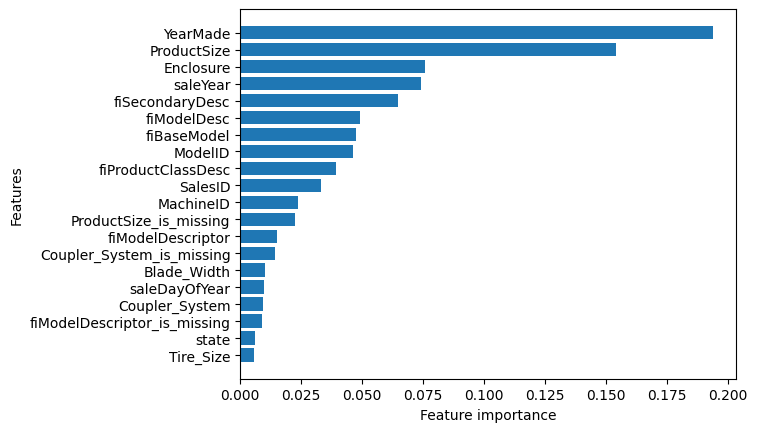

In [99]:
plot_features(X_train.columns,ideal_model.feature_importances_)